In [1]:
from functools import partial
from multiprocessing import Pool
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from infomap import Infomap
from infomap_worker import infomap_worker

In [2]:
args = {
    "silent": True,
    "directed": True
}

num_trials = 100

In [3]:
%%time

im = Infomap(num_trials=num_trials, **args)
im.read_file("science1997_2y.net")
im.run()
im.codelength, im.num_top_modules

CPU times: user 1min 40s, sys: 39.1 s, total: 2min 19s
Wall time: 40.3 s


(7.293725695201871, 69)

In [4]:
%%time

worker = partial(infomap_worker, **args)

with Pool() as p:
    worker_args = (("science1997_2y.net", f"output/science1997_{seed}.tree", seed) for seed in range(1, num_trials+1))
    output = p.starmap(worker, worker_args)

runs = pd.DataFrame(output).sort_values("codelength").reset_index(drop=True)
runs.head()

CPU times: user 56.7 ms, sys: 92.5 ms, total: 149 ms
Wall time: 13.3 s


,codelength,num_levels,num_top_modules,eff_num_top_modules,outname
0,7.295476,4,67,2.798894,output/science1997_52.tree
1,7.296154,4,69,2.827758,output/science1997_82.tree
2,7.296576,4,68,2.757615,output/science1997_83.tree
3,7.296610,4,69,2.813773,output/science1997_40.tree
4,7.296678,4,69,2.818492,output/science1997_44.tree


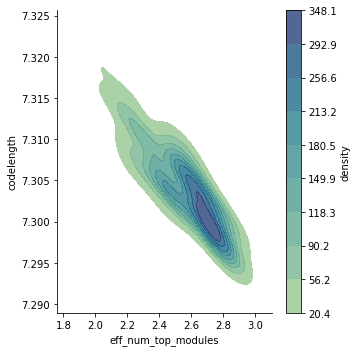

In [5]:
sns.displot(runs,
            y="codelength",
            x="eff_num_top_modules",
            kind="kde",
            fill=True,
            alpha=.8,
            cmap="crest",
            cbar=True,
            cbar_kws={"label": "density"})

In [6]:
best = runs.iloc[0].outname
tree = pd.read_csv(best, sep=" ", comment="#", names=["path", "flow", "name", "node_id"])
tree["module"] = tree.path.apply(lambda x: ":".join(x.split(":")[0:-1]))
tree["top_module"] = tree.path.apply(lambda x: x.split(":")[0])
tree

,path,flow,name,node_id,module,top_module
0,1:1:1,0.032975,J BIOL CHEM,2557,1:1,1
1,1:1:2,0.030853,NATURE,3683,1:1,1
2,1:1:3,0.029864,SCIENCE,4460,1:1,1
3,1:1:4,0.024917,P NATL ACAD SCI USA,3934,1:1,1
4,1:1:5,0.022752,CELL,965,1:1,1
...,...,...,...,...,...,...
6434,63:1,0.000000,SOC DYNAMICS,6276,63,63
6435,64:1,0.000000,WILSON LIBR BULL,6405,64,64
6436,65:1,0.000000,WORKFORCE,6415,65,65
6437,66:1,0.000000,ACTA BIOL CRACOV BOT,33,66,66
